# Embedding effect on ESN - IMDB dataset

## Librairies

- Needs ``matplotlib``

Install it from command line if necessary

In [8]:
import io
import os
import re
import sys

In [9]:
import pickle
import time
from timeit import default_timer as timer

import numpy as np
import random

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

ModuleNotFoundError: No module named 'matplotlib'

## Plots

### TREC-6

In [4]:
TITLE = 'TREC-6'

Baseline = [89.80]

ESN ={    
    500: (90.44,0.45), 
    1000: (92.36, 0.75), 
    3000: (94.68, 0.51),
    5000: (95.28, 0.45)
}

Bi_LSTM = [92.95]

BERT_1 = [96.60]

BERT_2 = [97.20]

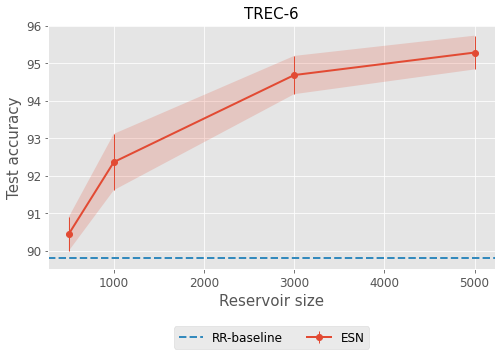

In [5]:
dims = ESN.keys()
acc = np.array([ESN[x][0] for x in ESN.keys()])
std = np.array([ESN[x][1] for x in ESN.keys()])


fig = plt.figure(figsize=(8, 4.5))

ax = fig.add_subplot(111)

# Baselines
ax.axhline(y=Baseline[0], linestyle='--', linewidth=2, color='C1', label='RR-baseline', alpha=1)

# ESNs
ax.errorbar(list(ESN.keys()), acc, std, color='C0', elinewidth=1, linewidth=2, label='ESN', marker='o', alpha=1)
# ax.plot(dims, acc, color='C0', linewidth=3, label='ESN (mean)', marker='o', alpha=0.7)
ax.fill_between(dims, acc+std, acc-std, alpha=0.2)

# Bi-LSTM 128
# ax.axhline(y=Bi_LSTM[0], linestyle='-', linewidth=2, color='C1', label='Bi-LSTM (128)', alpha=1)
# # ax.axhspan(Bi_LSTM[0] - 00.4039, Bi_LSTM[0] + 00.4039, color='black', alpha=0.1)

# BERTs
#ax.axhline(y=BERT_1[0], linestyle='-', linewidth=2, color='black', label='BERT_ft (ours)', alpha=0.5)
#ax.axhline(y=BERT_2[0], linestyle='-', linewidth=2, color='black', label='BERT_ft (literature)', alpha=1.0)

ax.set_title(TITLE, fontsize=15)
ax.set_ylabel('Test accuracy', fontsize=15)
ax.set_xlabel('Reservoir size', fontsize=15)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# # change legend order
# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0], handles[4], handles[1], handles[2], handles[3]]
# labels = [labels[0], labels[4], labels[1], labels[2], labels[3]]

# if no BERT displayed
# put nol=3
# change legend order
# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0], handles[2], handles[1]]
# labels = [labels[0], labels[2], labels[1]]

# if no BERT and Bi-LSTM displayed
# put nol=2
# change legend order
handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = [labels[0], labels[1]]

plt.legend(handles, labels, loc='lower center', prop={'size': 12}, ncol=2, bbox_to_anchor=(0.5, -0.35))
plt.savefig('plots/'+TITLE+'.pdf', bbox_inches = 'tight')

### TREC-50

In [6]:
TITLE = 'TREC-50'

Baseline = [75.60]

ESN ={
    500: (74.60, 0.61),
    1000: (78.60, 0.74),
    3000: (83.36, 0.34),
    5000: (84.04, 0.43)
}

Bi_LSTM = [77.81]

BERT_1 = [79.40]

BERT_2 = []

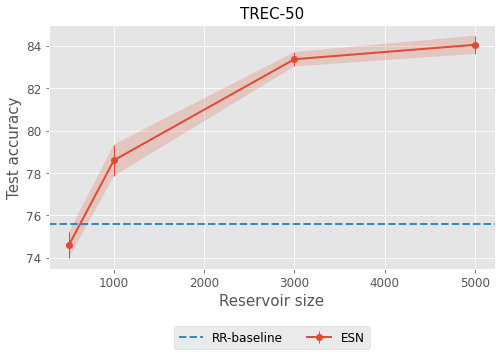

In [7]:
dims = ESN.keys()
acc = np.array([ESN[x][0] for x in ESN.keys()])
std = np.array([ESN[x][1] for x in ESN.keys()])


fig = plt.figure(figsize=(8, 4.5))

ax = fig.add_subplot(111)

# Baselines
ax.axhline(y=Baseline[0], linestyle='--', linewidth=2, color='C1', label='RR-baseline', alpha=1)

# ESNs
ax.errorbar(list(ESN.keys()), acc, std, color='C0', elinewidth=1, linewidth=2, label='ESN', marker='o', alpha=1)
# ax.plot(dims, acc, color='C0', linewidth=3, label='ESN (mean)', marker='o', alpha=0.7)
ax.fill_between(dims, acc+std, acc-std, alpha=0.2)

# Bi-LSTM 128
# ax.axhline(y=Bi_LSTM[0], linestyle='-', linewidth=2, color='C1', label='Bi-LSTM (128)', alpha=1)
# # ax.axhspan(Bi_LSTM[0] - 00.4039, Bi_LSTM[0] + 00.4039, color='black', alpha=0.1)

# BERTs
# ax.axhline(y=BERT_1[0], linestyle='-', linewidth=2, color='black', label='BERT_ft (ours)', alpha=0.5)
# ax.axhline(y=BERT_2[0], linestyle='-', linewidth=2, color='black', label='BERT_ft (literature)', alpha=1.0)

ax.set_title(TITLE, fontsize=15)
ax.set_ylabel('Test accuracy', fontsize=15)
ax.set_xlabel('Reservoir size', fontsize=15)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# # change legend order
# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0], handles[3], handles[1], handles[2]]
# labels = [labels[0], labels[3], labels[1], labels[2]]

# if no BERT displayed
# change legend order
# put ncol=3
# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0], handles[2], handles[1]]
# labels = [labels[0], labels[2], labels[1]]

# if no BERT and Bi-LSTM displayed
# put nol=2
# change legend order
handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = [labels[0], labels[1]]

plt.legend(handles, labels, loc='lower center', prop={'size': 12}, ncol=2, bbox_to_anchor=(0.5, -0.35))
plt.savefig('plots/'+TITLE+'.pdf', bbox_inches = 'tight')

### SST-2

In [8]:
TITLE = 'SST-2'

Baseline = [85.34]

ESN ={
    500: (83.79, 0.37),
    1000: (84.63, 0.11), 
    3000: (85.63, 0.25),
    5000: (86.23, 0.32)
}

Bi_LSTM = [86.27]

BERT_1 = [92.20]

BERT_2 = [93.50]

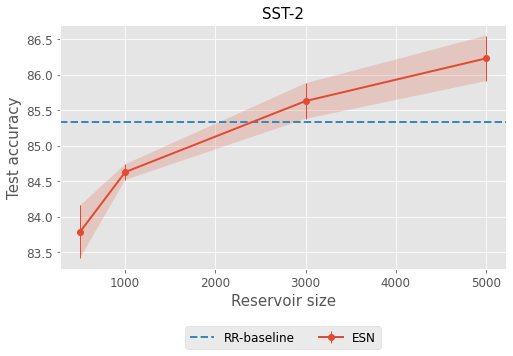

In [9]:
dims = ESN.keys()
acc = np.array([ESN[x][0] for x in ESN.keys()])
std = np.array([ESN[x][1] for x in ESN.keys()])


fig = plt.figure(figsize=(8, 4.5))

ax = fig.add_subplot(111)

# Baselines
ax.axhline(y=Baseline[0], linestyle='--', linewidth=2, color='C1', label='RR-baseline', alpha=1)

# ESNs
ax.errorbar(list(ESN.keys()), acc, std, color='C0', elinewidth=1, linewidth=2, label='ESN', marker='o', alpha=1)
# ax.plot(dims, acc, color='C0', linewidth=3, label='ESN (mean)', marker='o', alpha=0.7)
ax.fill_between(dims, acc+std, acc-std, alpha=0.2)

# Bi-LSTM 128
# ax.axhline(y=Bi_LSTM[0], linestyle='-', linewidth=2, color='C1', label='Bi-LSTM (128)', alpha=1)
# # ax.axhspan(Bi_LSTM[0] - 00.4039, Bi_LSTM[0] + 00.4039, color='black', alpha=0.1)

# # BERTs
# ax.axhline(y=BERT_1[0], linestyle='-', linewidth=2, color='black', label='BERT_ft (ours)', alpha=0.5)
# ax.axhline(y=BERT_2[0], linestyle='-', linewidth=2, color='black', label='BERT_ft (literature)', alpha=1.0)

ax.set_title(TITLE, fontsize=15)
ax.set_ylabel('Test accuracy', fontsize=15)
ax.set_xlabel('Reservoir size', fontsize=15)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# # change legend order
# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0], handles[4], handles[1], handles[2], handles[3]]
# labels = [labels[0], labels[4], labels[1], labels[2], labels[3]]

# if no BERT displayed
# change legend order
# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0], handles[2], handles[1]]
# labels = [labels[0], labels[2], labels[1]]

# if no BERT and Bi-LSTM displayed
# put nol=2
# change legend order
handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = [labels[0], labels[1]]

plt.legend(handles, labels, loc='lower center', prop={'size': 12}, ncol=3, bbox_to_anchor=(0.5, -0.35))
plt.savefig('plots/'+TITLE+'.pdf', bbox_inches = 'tight')

### IMDB

In [10]:
TITLE = 'IMDB'

Baseline = [88.46]

ESN ={
    500: (87.66, 0.14), 
    1000: (88.36, 0.08),
    3000: (89.14, 0.05), 
    5000: (89.46, 0.08)
}

Bi_LSTM = [91.77]

BERT_1 = [93.60]

BERT_2 = [95.63]

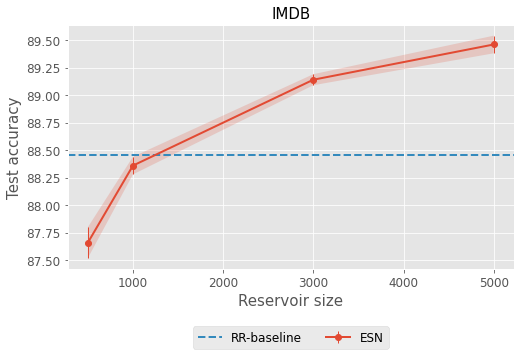

In [11]:
dims = ESN.keys()
acc = np.array([ESN[x][0] for x in ESN.keys()])
std = np.array([ESN[x][1] for x in ESN.keys()])


fig = plt.figure(figsize=(8, 4.5))

ax = fig.add_subplot(111)

# Baselines
ax.axhline(y=Baseline[0], linestyle='--', linewidth=2, color='C1', label='RR-baseline', alpha=1)

# ESNs
ax.errorbar(list(ESN.keys()), acc, std, color='C0', elinewidth=1, linewidth=2, label='ESN', marker='o', alpha=1)
# ax.plot(dims, acc, color='C0', linewidth=3, label='ESN (mean)', marker='o', alpha=0.7)
ax.fill_between(dims, acc+std, acc-std, alpha=0.2)

# Bi-LSTM 128
# ax.axhline(y=Bi_LSTM[0], linestyle='-', linewidth=2, color='C1', label='Bi-LSTM (128)', alpha=1)
# # ax.axhspan(Bi_LSTM[0] - 00.4039, Bi_LSTM[0] + 00.4039, color='black', alpha=0.1)

# # BERTs
# ax.axhline(y=BERT_1[0], linestyle='-', linewidth=2, color='black', label='BERT_ft (ours)', alpha=0.5)
# ax.axhline(y=BERT_2[0], linestyle='-', linewidth=2, color='black', label='BERT_ft (literature)', alpha=1.0)

ax.set_title(TITLE, fontsize=15)
ax.set_ylabel('Test accuracy', fontsize=15)
ax.set_xlabel('Reservoir size', fontsize=15)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# # change legend order
# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0], handles[4], handles[1], handles[2], handles[3]]
# labels = [labels[0], labels[4], labels[1], labels[2], labels[3]]

# if no BERT displayed
# change legend order
# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0], handles[2], handles[1]]
# labels = [labels[0], labels[2], labels[1]]

# if no BERT and Bi-LSTM displayed
# put nol=2
# change legend order
handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = [labels[0], labels[1]]

plt.legend(handles, labels, loc='lower center', prop={'size': 12}, ncol=3, bbox_to_anchor=(0.5, -0.35))
plt.savefig('plots/'+TITLE+'.pdf', bbox_inches = 'tight')

### AG-NEWS

In [12]:
TITLE = 'AG-news'

Baseline = [90.45]

ESN ={
    500: (90.11, 0.11),
    1000: (90.73, 0.18),
    3000: (91.12, 0.14),
    5000: (91.30, 0.18)
}

Bi_LSTM = [93.18]

BERT_1 = [94.24]

BERT_2 = [94.75]

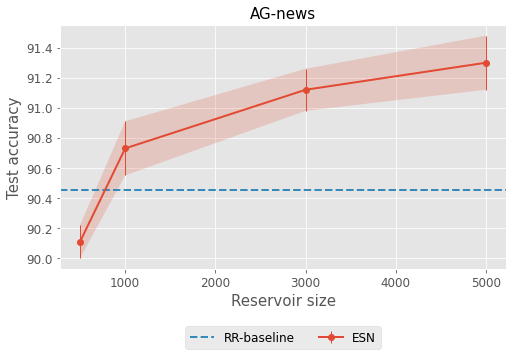

In [13]:
dims = ESN.keys()
acc = np.array([ESN[x][0] for x in ESN.keys()])
std = np.array([ESN[x][1] for x in ESN.keys()])


fig = plt.figure(figsize=(8, 4.5))

ax = fig.add_subplot(111)

# Baselines
ax.axhline(y=Baseline[0], linestyle='--', linewidth=2, color='C1', label='RR-baseline', alpha=1)

# ESNs
ax.errorbar(list(ESN.keys()), acc, std, color='C0', elinewidth=1, linewidth=2, label='ESN', marker='o', alpha=1)
# ax.plot(dims, acc, color='C0', linewidth=3, label='ESN (mean)', marker='o', alpha=0.7)
ax.fill_between(dims, acc+std, acc-std, alpha=0.2)

# Bi-LSTM 128
# ax.axhline(y=Bi_LSTM[0], linestyle='-', linewidth=2, color='C1', label='Bi-LSTM (128)', alpha=1)
# # ax.axhspan(Bi_LSTM[0] - 00.4039, Bi_LSTM[0] + 00.4039, color='black', alpha=0.1)

# # BERTs
# ax.axhline(y=BERT_1[0], linestyle='-', linewidth=2, color='black', label='BERT_ft (ours)', alpha=0.5)
# ax.axhline(y=BERT_2[0], linestyle='-', linewidth=2, color='black', label='BERT_ft (literature)', alpha=1.0)

ax.set_title(TITLE, fontsize=15)
ax.set_ylabel('Test accuracy', fontsize=15)
ax.set_xlabel('Reservoir size', fontsize=15)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# # change legend order
# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0], handles[4], handles[1], handles[2], handles[3]]
# labels = [labels[0], labels[4], labels[1], labels[2], labels[3]]

# if no BERT displayed
# change legend order
# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0], handles[2], handles[1]]
# labels = [labels[0], labels[2], labels[1]]

# if no BERT and Bi-LSTM displayed
# put nol=2
# change legend order
handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = [labels[0], labels[1]]

plt.legend(handles, labels, loc='lower center', prop={'size': 12}, ncol=3, bbox_to_anchor=(0.5, -0.35))
plt.savefig('plots/'+TITLE+'.pdf', bbox_inches = 'tight')